# WGS

[-21.96325118297854, -28557.622010336156]

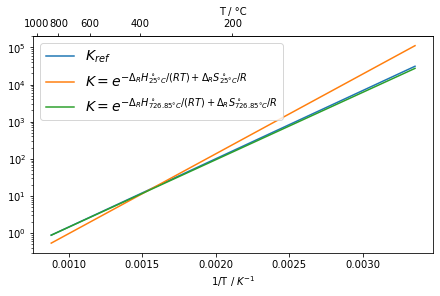

In [2]:
from matplotlib import pyplot as plt
from numpy import linspace, exp, log
# 25°C
DeltaG=(-394.38+0-(-228.42-137.16))*1000 # J/mol
DeltaH=(-393.51+0-(-110.53-241.81))*1000 # J/mol
DeltaS=(DeltaH-DeltaG)/(298.15) # J/mol/K

def DeltaCp(T):
    # R.L. Keiski et al./Applied Catalysis A: General 137 (1996) 349-370 
    return -9.03+54.3e-3*T-4.7e-5*T**2+12.41e-9*T**3
def SDeltaCp(T,T0=298.15):
    # R.L. Keiski et al./Applied Catalysis A: General 137 (1996) 349-370 
    return -9.03*(T-T0)+54.3e-3*(T**2-T0**2)/2-4.7e-5*(T**3-T0**3)/3+12.41e-9*(T**4-T0**4)/4
def SDeltaCp_T(T,T0=298.15):
    # R.L. Keiski et al./Applied Catalysis A: General 137 (1996) 349-370 
    return -9.03*log(T/T0)+54.3e-3*(T-T0)-4.7e-5*(T**2-T0**2)/2+12.41e-9*(T**3-T0**3)/3

T=linspace(298.15,860+273.15,30) # K
R=8.3145 # J/mol/K
fig,ax=plt.subplots(1,1,constrained_layout=True)
plt.semilogy(1/T,exp(35211/(R*T)-32.1153/R),label='$K_{ref}$')
#plt.semilogy(1/T,exp(-0.29),label='$K_{ref,2}$')
plt.semilogy(1/T,exp(-DeltaH/(R*T)+DeltaS/R),label=r'$K=e^{-\Delta_R H^\circ_{25°C}/(R T)+\Delta_R S^\circ_{25°C}/R}$') # ref. 25°C

# 726,85 °C = 1000 K
DeltaG=(-395.886+0-(-192.590-200.275))*1000 # J/mol
DeltaH=(-394.623+0-(-247.857-111.983))*1000 # J/mol
DeltaS=(DeltaH-DeltaG)/(726.85+273.15) # J/mol/K

plt.semilogy(1/T,exp(-DeltaH/(R*T)+DeltaS/R),label=r'$K=e^{-\Delta_R H^\circ_{726.85°C}/(R T)+\Delta_R S^\circ_{726.85°C}/R}$') # ref. 800°C

plt.xlabel('1/T / $K^{-1}$')
plt.legend(loc='best',fontsize=14)
secax=ax.secondary_xaxis('top',functions=(lambda x: 1/x-273.15,lambda x: 1/(x+273.15)))
secax.set_xlabel('T / °C')
[DeltaS+SDeltaCp_T(273.15+726.85),
DeltaH+SDeltaCp(273.15+726.85)]

deviation in %
* Delta Cp
* Delta_R S
* Delta_R G
* Delta_R H

In [3]:
T=[25,726.85] # °C
DeltaH_actual=[
    (-393.51+0-(-110.53-241.81))*1000, # J/mol
    (-394.623+0-(-247.857-111.983))*1000 # J/mol
] # from JANAF tables
DeltaG_actual=[
    (-394.38+0-(-228.42-137.16))*1000, # J/mol
    (-395.886+0-(-192.590-200.275))*1000 # J/mol
] # from JANAF tables
DeltaS_actual=[(DeltaH_actual[i]-DeltaG_actual[i])/(T[i]+273.15) for i in range(len(T))] # J/mol/K
DeltaCp_actual=[
    28.836+37.129-33.590-29.142, # J/(mol K)
    30.205+54.308-41.268-33.183 # J/(mol K)
] # from JANAF tables
DeltaCp_calc=[DeltaCp(x+273.15) for x in T] # function in Keiski et al.
DeltaH_calc=[DeltaH_actual[0]+SDeltaCp(T[i]+273.15) for i in range(len(T))] # T-correction based on DeltaCp
DeltaS_calc=[DeltaS_actual[0]+SDeltaCp_T(T[i]+273.15) for i in range(len(T))] # T-correction based on DeltaCp
DeltaG_calc=[DeltaH_calc[i]-(T[i]+273.15)*DeltaS_calc[i] for i in range(len(T))] # T-correction based on DeltaCp
print('T/°C \tDeltaH\tDeltaS\tDeltaG\tDeltaCp')
for i in range(len(T)):
    err_DeltaCp=100*(DeltaCp_calc[i]/DeltaCp_actual[i]-1) # %
    err_DeltaH=100*(DeltaH_calc[i]/DeltaH_actual[i]-1) # %
    err_DeltaS=100*(DeltaS_calc[i]/DeltaS_actual[i]-1) # %
    err_DeltaG=100*(DeltaG_calc[i]/DeltaG_actual[i]-1) # %
    print('{:0.2f}\t{:0.3f}%\t{:0.3f}%\t{:0.3f}%\t{:0.3f}%'.format(T[i],err_DeltaH,err_DeltaS,err_DeltaG,err_DeltaCp))

T/°C 	DeltaH	DeltaS	DeltaG	DeltaCp
25.00	0.000%	0.000%	-0.000%	2.396%
726.85	0.465%	-0.225%	7.719%	6.142%


Compare Cp from Burcat polynomial to Keiski et al

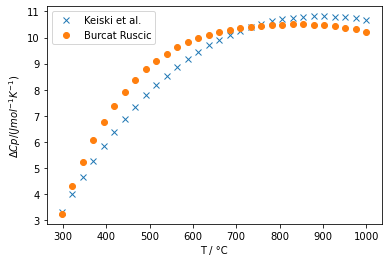

In [4]:
from numpy import array
R=8.3145 # J / (mol K)
Cp_R_coefs=array([x.split('\t') for x in """3,5795335	-0,000610354	1,02E-06	9,07E-10	-9,04E-13	-14344,086	3,5084093
4,1986352	-0,002036402	6,52E-06	-5,49E-09	1,77E-12	-30293,726	-0,84900901
2,356813	0,00898413	-7,12E-06	2,46E-09	-1,43E-13	-48371,971	9,9009035
2,34433112	0,007980521	-1,95E-05	2,02E-08	-7,38E-12	-917,935173	0,683010238
""".replace(',','.').split('\n') if len(x)>0],dtype=float
)[:,:4+1] # order: CO,H2O,CO2,H2

def DeltaCp_2(T):
    nu_i=array([-1,-1,1,1])
    return R*nu_i.dot(Cp_R_coefs.dot(pow(T,array([[0],[1],[2],[3],[4]]))))

T=linspace(298.15,1000,30)
plt.plot(T,DeltaCp(T),'x',label='Keiski et al.')
plt.plot(T,DeltaCp_2(T),'o',label='Burcat Ruscic')
plt.ylabel('$\Delta Cp / (J mol^{-1} K^{-1})$')
plt.xlabel('T / °C')
plt.legend(loc='best');

In [5]:
# 780 °C
T=780+273.15 # K
K_C=exp(-DeltaH_actual[1]/(R*T)+DeltaS_actual[1]/R)
1/K_C

0.8588044137113603

# Methanisierung